<a href="https://colab.research.google.com/github/awakia/colab/blob/main/%E9%9F%B3%E5%A3%B0%E5%85%A5%E5%8A%9B%E3%82%B5%E3%83%B3%E3%83%97%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install librosa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-pyaudio is already the newest version (0.2.11-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
import IPython.display
import librosa
import librosa.display

In [ ]:
# https://gist.github.com/tam17aki/8bfa2a42dab0061ee2641aed32dd1d30

from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = """
const sleep = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec, filename='audio.wav'):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec * 1000))
  b = b64decode(s.split(',')[1])
  with open(filename, 'wb+') as f:
    f.write(b)

In [ ]:
audiofile = "audio.wav"
second = 3
print(f"Speak to your microphone {second} sec...")
record(second, audiofile)
print("Done!")

Speak to your microphone 3 sec...


<IPython.core.display.Javascript object>

Done!


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


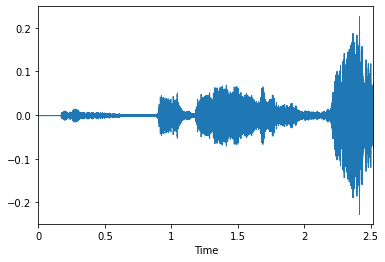

In [ ]:
speech, rate = librosa.load(audiofile, sr=16000)
librosa.display.waveplot(speech, sr=rate)

In [ ]:
IPython.display.Audio("audio.wav")